In [39]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from pysteps.visualization import plot_precip_field


In [40]:

dataset = xr.open_dataset('/Users/jan/Downloads/testdata_two_days_2019_01_01-02_sprog_predictions.zarr', engine='zarr')
dataset

<xarray.Dataset> Size: 72GB
Dimensions:    (lead_time: 12, time: 572, y: 1200, x: 1100)
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 96B 00:00:00 00:05:00 ... 00:55:00
    step       timedelta64[ns] 8B ...
  * time       (time) datetime64[ns] 5kB 2019-01-01 ... 2019-01-02T23:35:00
  * x          (x) float64 9kB -543.5 -542.5 -541.5 -540.5 ... 553.5 554.5 555.5
  * y          (y) float64 10kB -3.61e+03 -3.611e+03 ... -4.808e+03 -4.809e+03
Data variables:
    sprog      (lead_time, time, y, x) float64 72GB ...

In [41]:
test = dataset.sprog.isel(
    time=50, #8
)
test.time

<xarray.DataArray 'time' ()> Size: 8B
array('2019-01-01T04:10:00.000000000', dtype='datetime64[ns]')
Coordinates:
    step     timedelta64[ns] 8B ...
    time     datetime64[ns] 8B 2019-01-01T04:10:00

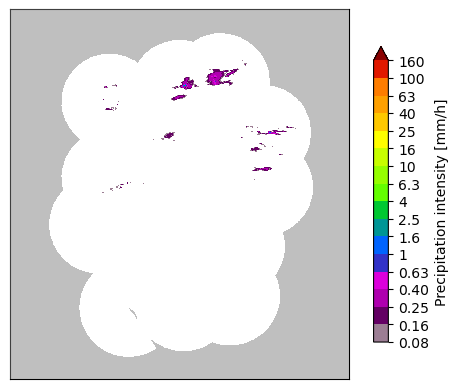

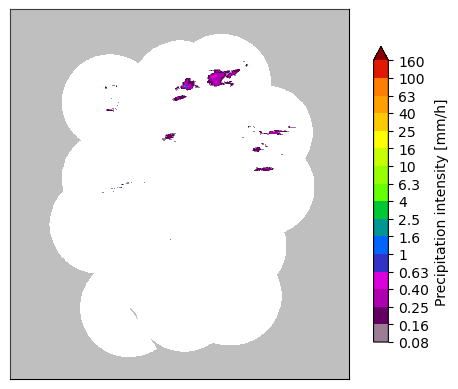

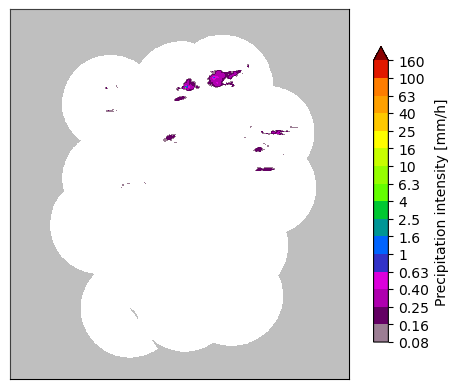

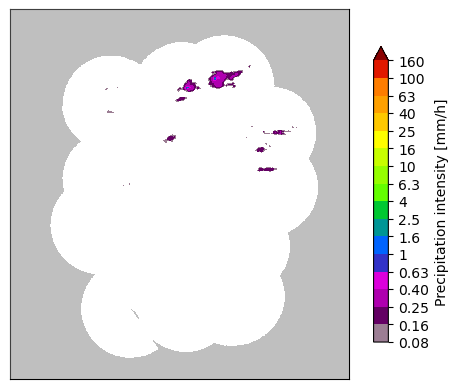

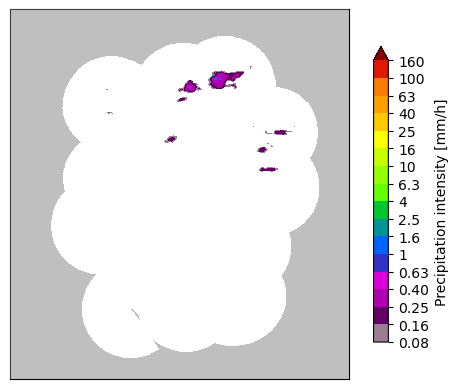

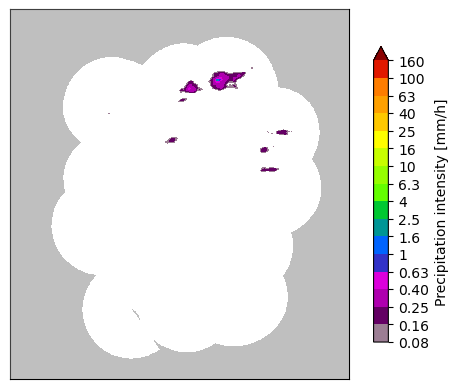

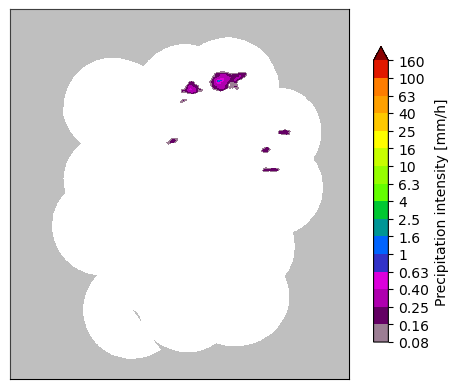

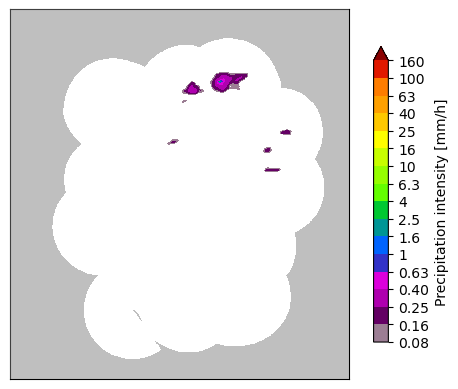

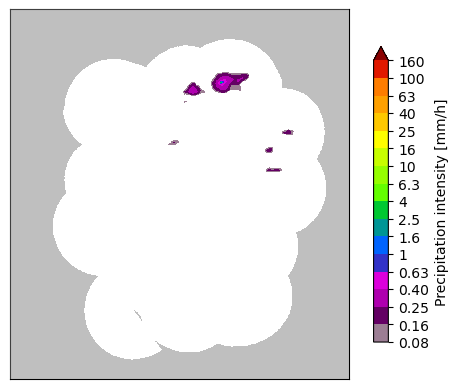

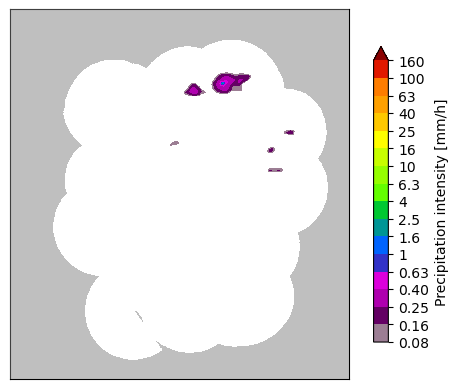

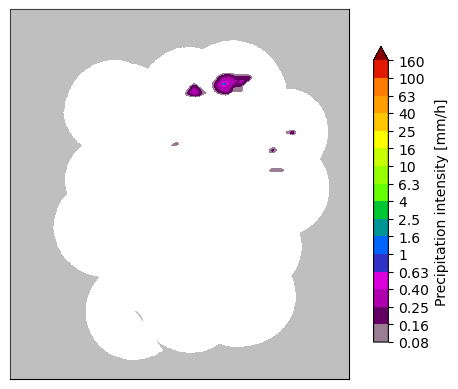

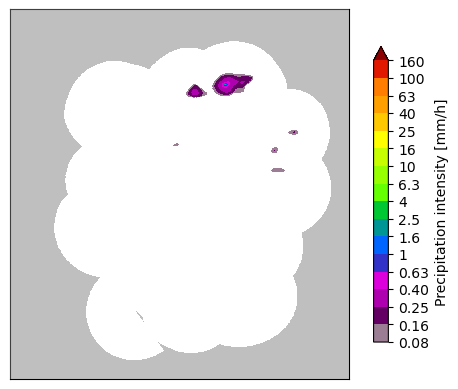

IndexError: range object index out of range

In [70]:
for i in range(12):
    to_plot = dataset.sprog.isel(
        time=50, #8
        lead_time=i,
    )
    plot_precip_field(to_plot)
    # plt.imshow(to_plot, norm=LogNorm(), cmap='viridis')
    # plt.colorbar()
    plt.savefig(f'/Users/jan/Downloads/img{10+i+1}', dpi=200)
    plt.show()






In [67]:
load_path = '/Users/jan/Programming/first_CNN_on_Radolan/dwd_nc/own_test_data/testdata_two_days_2019_01_01-02.zarr'
observed_data = xr.open_dataset(load_path, engine='zarr')
observed_data.dims

FrozenMappingWarningOnValuesAccess({'step': 1, 'time': 576, 'y': 1200, 'x': 1100})

In [68]:
observed_plotting = observed_data.RV_recalc.sel(
    time='2019-01-01T04:30:00.000000000', #8
)
observed_plotting.time

<xarray.DataArray 'time' ()> Size: 8B
array('2019-01-01T04:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-01-01T04:30:00

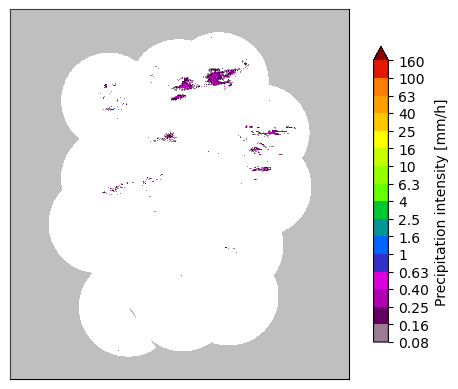

In [69]:



observed_plotting = np.squeeze(observed_plotting.values)


# plt.imshow(observed_plotting, norm=LogNorm(), cmap='viridis')
# plt.colorbar()
plot_precip_field(observed_plotting)
plt.savefig(f'/Users/jan/Downloads/img_10.png', dpi=200)
plt.show()

In [46]:
dataset.time[50]

<xarray.DataArray 'time' ()> Size: 8B
array('2019-01-01T04:10:00.000000000', dtype='datetime64[ns]')
Coordinates:
    step     timedelta64[ns] 8B ...
    time     datetime64[ns] 8B 2019-01-01T04:10:00

In [47]:
observed_data.time[50]

<xarray.DataArray 'time' ()> Size: 8B
array('2019-01-01T04:10:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-01-01T04:10:00

In [48]:
observed_data.attrs

{'crs': '+proj=stere +lat_0=90 +lat_ts=90 +lon_0=10 +k=0.93301270189 +x_0=0 +y_0=0 +a=6370040 +b=6370040 +to_meter=1000 +no_defs',
 'nodata': nan,
 'notes': 'The grid point RV_recalc[0,0] corresponds to the top-left corner. Transform root point is top-left. Grid coordinates indicate the bottom left corner of the pixel. The data values were interpolated if the time values of the dataset did not match the desired time values.',
 'transform': [1.0, 0.0, -543.4621669218559, 0.0, -1.0, -3609.644724265573]}

In [49]:
load_path_dem = '/Users/jan/Programming/geo_data/static/dem_benchmark_dataset_1200_1100.zarr'
dem = xr.open_zarr(load_path_dem)

In [50]:
dem.attrs

{'crs': '+proj=stere +lat_0=90 +lat_ts=90 +lon_0=10 +k=0.93301270189 +x_0=0 +y_0=0 +a=6370040 +b=6370040 +to_meter=1000 +no_defs',
 'nodata': nan,
 'transform': [1.0,
  0.0,
  -543.4621669218559,
  0.0,
  -1.0,
  -3609.644724265573,
  0.0,
  0.0,
  1.0]}

In [51]:
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'